# Image Segmentation V1

In [43]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [39]:
#dataset,info = tfds.load('curated_breast_imaging_ddsm/patches',split=['train','test','validation'],shuffle_files=True,
#                   with_info=True)
#ds_train,ds_test,ds_valid = dataset

In [40]:
dataset,info = tfds.load('curated_breast_imaging_ddsm/original-calc',split=['train','test'],shuffle_files=True,
                   with_info=True)
ds_train,ds_test = dataset

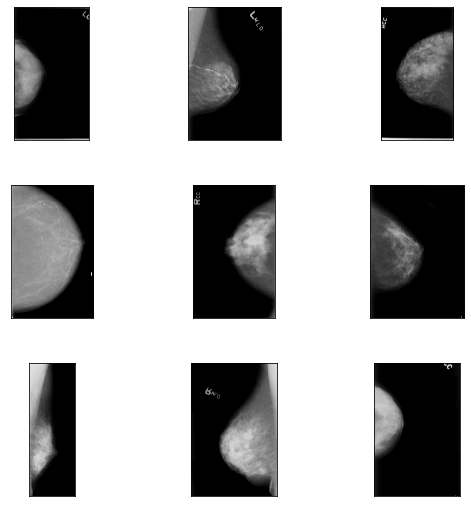

In [41]:
fig = tfds.show_examples(ds_train,info)


In [42]:
#dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

In [31]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [32]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128,128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128,128))
    
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    
    input_image, input_mask = normalize(input_image, input_mask)
    
    return input_image, input_mask

In [33]:
def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128,128))
    input_mask = tf.image.resize(datapoint['image'], (128,128))
    
    input_image, input_mask = normalize(input_image, input_mask)
    
    return input_image, input_mask

In [34]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [35]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [46]:
dataset

[<_OptionsDataset shapes: {abnormalities: {assessment: (None,), calc_distribution: (None,), calc_type: (None,), id: (None,), mask: (None, None, None, 1), pathology: (None,), subtlety: (None,)}, breast: (), id: (), image: (None, None, 1), patient: (), view: ()}, types: {abnormalities: {assessment: tf.int64, calc_distribution: tf.int64, calc_type: tf.int64, id: tf.int32, mask: tf.uint8, pathology: tf.int64, subtlety: tf.int64}, breast: tf.int64, id: tf.string, image: tf.uint8, patient: tf.string, view: tf.int64}>,
 <_OptionsDataset shapes: {abnormalities: {assessment: (None,), calc_distribution: (None,), calc_type: (None,), id: (None,), mask: (None, None, None, 1), pathology: (None,), subtlety: (None,)}, breast: (), id: (), image: (None, None, 1), patient: (), view: ()}, types: {abnormalities: {assessment: tf.int64, calc_distribution: tf.int64, calc_type: tf.int64, id: tf.int32, mask: tf.uint8, pathology: tf.int64, subtlety: tf.int64}, breast: tf.int64, id: tf.string, image: tf.uint8, pa

In [50]:
ds_train

<_OptionsDataset shapes: {abnormalities: {assessment: (None,), calc_distribution: (None,), calc_type: (None,), id: (None,), mask: (None, None, None, 1), pathology: (None,), subtlety: (None,)}, breast: (), id: (), image: (None, None, 1), patient: (), view: ()}, types: {abnormalities: {assessment: tf.int64, calc_distribution: tf.int64, calc_type: tf.int64, id: tf.int32, mask: tf.uint8, pathology: tf.int64, subtlety: tf.int64}, breast: tf.int64, id: tf.string, image: tf.uint8, patient: tf.string, view: tf.int64}>